<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_2_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.145607,21.710007,48.628358,0.076440,111.560412,111.514169,0.046243
1,0.0,1.0,82.493748,83.038709,97.385286,0.008487,272.926230,272.918458,0.007772
2,0.0,2.0,78.340575,66.273323,30.402214,-0.005119,185.010992,185.012478,-0.001486
3,0.0,3.0,31.878142,47.995273,46.362059,0.005454,136.240928,136.255453,-0.014525
4,0.0,4.0,90.612481,63.255670,55.725324,-0.007310,219.586166,219.591645,-0.005479
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,70.039931,81.402669,20.868203,0.000697,182.311501,182.311206,0.000294
19996,999.0,16.0,72.532113,36.780048,29.315179,0.007140,148.634480,148.624242,0.010238
19997,999.0,17.0,29.306998,98.928516,33.415544,-0.003019,171.648040,171.651203,-0.003163
19998,999.0,18.0,43.101232,59.309375,79.611507,-0.005972,192.016142,192.014126,0.002017


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    31.145607  21.710007  48.628358  0.076440  111.560412   
      1.0    82.493748  83.038709  97.385286  0.008487  272.926230   
      2.0    78.340575  66.273323  30.402214 -0.005119  185.010992   
      3.0    31.878142  47.995273  46.362059  0.005454  136.240928   
      4.0    90.612481  63.255670  55.725324 -0.007310  219.586166   
...                ...        ...        ...       ...         ...   
999.0 15.0   70.039931  81.402669  20.868203  0.000697  182.311501   
      16.0   72.532113  36.780048  29.315179  0.007140  148.634480   
      17.0   29.306998  98.928516  33.415544 -0.003019  171.648040   
      18.0   43.101232  59.309375  79.611507 -0.005972  192.016142   
      19.0   44.728299  24.306236  35.695462  0.028215  114.758212   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.514169  0.046243  
      1.0    272.918458  0.007772  
      2.0    185.012478 -0.001486  
      3.0    136.255453 -0.014525  
      4.0    219.591645 -0.005479  
...                 ...       ...  
999.0 15.0   182.311206  0.000294  
      16.0   148.624242  0.010238  
      17.0   171.651203 -0.003163  
      18.0   192.014126  0.002017  
      19.0   114.725685  0.032527  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    31.145607  21.710007  48.628358  0.076440  111.560412   
      1.0    82.493748  83.038709  97.385286  0.008487  272.926230   
      2.0    78.340575  66.273323  30.402214 -0.005119  185.010992   
      3.0    31.878142  47.995273  46.362059  0.005454  136.240928   
      4.0    90.612481  63.255670  55.725324 -0.007310  219.586166   
...                ...        ...        ...       ...         ...   
999.0 15.0   70.039931  81.402669  20.868203  0.000697  182.311501   
      16.0   72.532113  36.780048  29.315179  0.007140  148.634480   
      17.0   29.306998  98.928516  33.415544 -0.003019  171.648040   
      18.0   43.101232  59.309375  79.611507 -0.005972  192.016142   
      19.0   44.728299  24.306236  35.695462  0.028215  114.758212   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.514169  0.046243  
      1.0    272.918458  0.007772  
      2.0    185.012478 -0.001486  
      3.0    136.255453 -0.014525  
      4.0    219.591645 -0.005479  
...                 ...       ...  
999.0 15.0   182.311206  0.000294  
      16.0   148.624242  0.010238  
      17.0   171.651203 -0.003163  
      18.0   192.014126  0.002017  
      19.0   114.725685  0.032527  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,31.145607,21.710007,48.628358,0.076440,111.560412,111.514169,0.046243
1,0.0,1.0,82.493748,83.038709,97.385286,0.008487,272.926230,272.918458,0.007772
2,0.0,2.0,78.340575,66.273323,30.402214,-0.005119,185.010992,185.012478,-0.001486
3,0.0,3.0,31.878142,47.995273,46.362059,0.005454,136.240928,136.255453,-0.014525
4,0.0,4.0,90.612481,63.255670,55.725324,-0.007310,219.586166,219.591645,-0.005479
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,70.039931,81.402669,20.868203,0.000697,182.311501,182.311206,0.000294
19996,999.0,16.0,72.532113,36.780048,29.315179,0.007140,148.634480,148.624242,0.010238
19997,999.0,17.0,29.306998,98.928516,33.415544,-0.003019,171.648040,171.651203,-0.003163
19998,999.0,18.0,43.101232,59.309375,79.611507,-0.005972,192.016142,192.014126,0.002017


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    31.145607  21.710007  48.628358  0.076440  111.560412   
      1.0    82.493748  83.038709  97.385286  0.008487  272.926230   
      2.0    78.340575  66.273323  30.402214 -0.005119  185.010992   
      3.0    31.878142  47.995273  46.362059  0.005454  136.240928   
      4.0    90.612481  63.255670  55.725324 -0.007310  219.586166   
...                ...        ...        ...       ...         ...   
999.0 15.0   70.039931  81.402669  20.868203  0.000697  182.311501   
      16.0   72.532113  36.780048  29.315179  0.007140  148.634480   
      17.0   29.306998  98.928516  33.415544 -0.003019  171.648040   
      18.0   43.101232  59.309375  79.611507 -0.005972  192.016142   
      19.0   44.728299  24.306236  35.695462  0.028215  114.758212   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    111.514169  0.046243  
      1.0    272.918458  0.007772  
      2.0    185.012478 -0.001486  
      3.0    136.255453 -0.014525  
      4.0    219.591645 -0.005479  
...                 ...       ...  
999.0 15.0   182.311206  0.000294  
      16.0   148.624242  0.010238  
      17.0   171.651203 -0.003163  
      18.0   192.014126  0.002017  
      19.0   114.725685  0.032527  

[20000 rows x 7 columns]

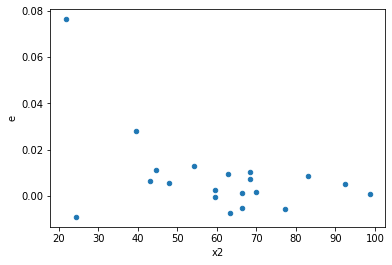

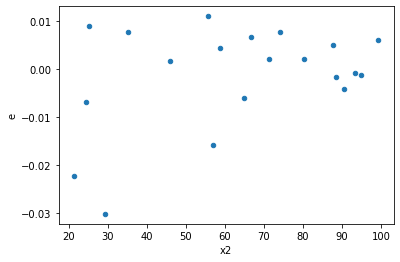

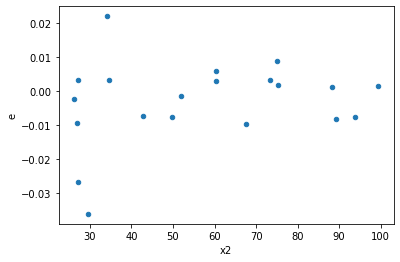

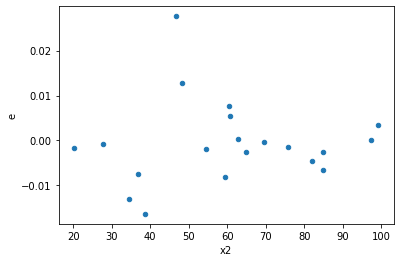

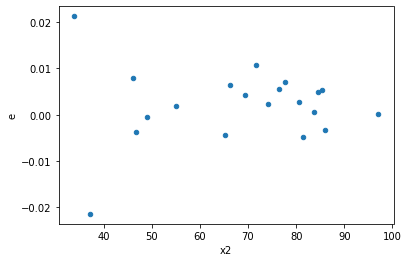

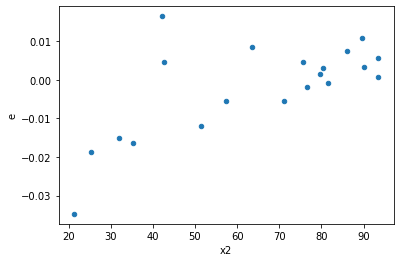

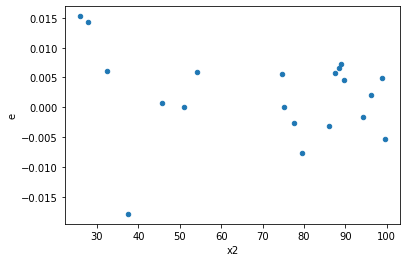

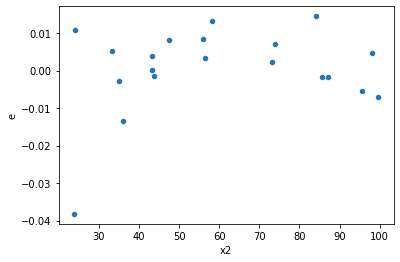

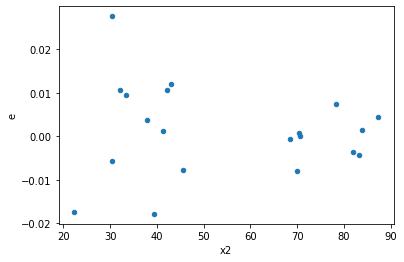

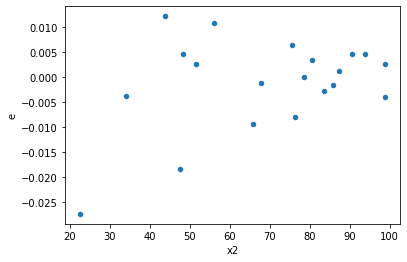

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,10.0,4.0,0.00042551135950103934,0.0010468646695100683,4.255113595010394e-05,0.00026171616737751706,6.150627040472178,0.09485654085016182,0.9525717295749191,0.04742827042508091,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.00027502721997912385,0.0014028520180156775,3.928960285416055e-05,0.00020040743114509678,5.10077518189713,0.047329235846314655,0.9763353820768427,0.023664617923157327,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,0.0001208164760376425,0.0005005446026342714,1.725949657680607e-05,7.150637180489592e-05,4.143016077362809,0.0803903767315659,0.959804811634217,0.04019518836578295,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,0.0001822104246087622,0.000322876851267919,3.0368404101460364e-05,4.0359606408489874e-05,1.3289999129901282,0.6905543739630042,0.6547228130184979,0.3452771869815021,Reject001=1 : Homoscedasticity
11.0,9.0,5.0,0.00018851738553514672,0.0012061749237830014,2.0946376170571857e-05,0.0002412349847566003,11.516788526672121,0.01506168502670091,0.9924691574866495,0.007530842513350455,Reject001=1 : Homoscedasticity
12.0,7.0,7.0,0.00021255404220144053,0.0011084350937783647,3.036486317163436e-05,0.0001583478705397664,5.214838928952877,0.044652168200949305,0.9776739158995253,0.022326084100474652,Reject001=1 : Homoscedasticity
13.0,10.0,4.0,0.0004073119425947897,0.0009813234843210068,4.073119425947897e-05,0.0002453308710802517,6.023169110077302,0.09833216015714252,0.9508339199214287,0.04916608007857126,Reject001=1 : Homoscedasticity
17.0,5.0,9.0,4.7204444092310666e-05,0.0015934300796280278,9.440888818462133e-06,0.00017704778662533643,18.75329643530073,0.0003222752493230452,0.9998388623753385,0.0001611376246615226,Reject001=0 : Heteroscedasticity
19.0,8.0,6.0,0.0008017955241571756,0.0008440981395699612,0.00010022444051964695,0.0001406830232616602,1.4036798063650173,0.6987363015368566,0.6506318492315717,0.3493681507684283,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,3.0,0.0034192875482082774,5.371943983252111e-05,0.00031084432256438884,1.7906479944173702e-05,0.05760594176676501,0.00035093304592668964,Reject001=0 : Heteroscedasticity
1.0,10.0,4.0,0.00042551135950103934,0.0010468646695100683,4.255113595010394e-05,0.00026171616737751706,6.150627040472178,0.09485654085016182,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.00027502721997912385,0.0014028520180156775,3.928960285416055e-05,0.00020040743114509678,5.10077518189713,0.047329235846314655,Reject001=1 : Homoscedasticity
3.0,14.0,1.0,0.0016105116285151813,4.924543844239157e-22,0.00011503654489394152,4.924543844239157e-22,4.280851662208182e-18,1.1634958521495757e-114,Reject001=0 : Heteroscedasticity
4.0,7.0,7.0,0.0001208164760376425,0.0005005446026342714,1.725949657680607e-05,7.150637180489592e-05,4.143016077362809,0.0803903767315659,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,0.0003269720785018513,0.0002898842376632527,5.449534641697522e-05,3.623552970790659e-05,0.6649288809111832,0.6369423909517486,Reject001=1 : Homoscedasticity
6.0,6.0,8.0,0.0001822104246087622,0.000322876851267919,3.0368404101460364e-05,4.0359606408489874e-05,1.3289999129901282,0.6905543739630042,Reject001=1 : Homoscedasticity
7.0,8.0,6.0,0.000977236003879514,0.00026494023334753625,0.00012215450048493924,4.415670555792271e-05,0.3614824290765031,0.18464756676524588,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,0.0008041295477243666,0.0001701569638413484,0.00011487564967490952,2.43081376916212e-05,0.2116039191979468,0.05771005643555981,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      738
Reject001=0 : Heteroscedasticity    262
Name: Result_test, dtype: int64